In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  
from scipy.stats import zscore

In [12]:
# Load dataset 
df = pd.read_csv("C:\\Users\\yo\\Downloads\\data\\sierraleone-bumbuna.csv")

# display first 5 row to check
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [13]:
# summary statistics and missing value report 

# summary statistics for numerican columns
print("numerican columns---------------------------------------------------")
print (df.describe())

# summary statistics for Categorical  columns
print("--------------------------------------------------------------------")
print(df.describe(include=["object"]))

# summary statistics for all column
print("===------------------------------------------------------------------")
print(df.describe(include="all"))

# summary dataset for fist 10 rows 
print("---------------------------------------------------------------------")
print(df.head(10))

# summary dataset for last 10 rows 
print ("--------------------------------------------------------------------")
print(df.tail(10))

# summary dataset for 10 randow rows 
print ("--------------------------------------------------------------------")
print(df.sample(10))

# overview of tha dateset shape
print ("--------------------------------------------------------------------")
print(df.info())

# Count missing values
print("---------------------------------------------------------------------")
missing_value = df.isna().sum()
print(missing_value)

# Check percentage of missing value
print ("-------------------------------------------------------------------")
percentage = missing_value*100
print (percentage)


numerican columns---------------------------------------------------
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.3000

In [14]:
# OutLier Detection 

# 1. Identifiy Numerical column by computing Z-score and flag outliers (|Z| > 3)

numerical_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_score = np.abs(stats.zscore(df[numerical_cols]))
outlier_flags = (z_score >3).any(axis=1)

print(f"Number of Outlier samples flagged: {outlier_flags.sum()}")
# print(f"\n Outlier Counts Per Column:\n", outlier_flags.sum().sort_values(ascending=False))

Number of Outlier samples flagged: 16292


In [ ]:
# 2. Imputation
# -----------------------------------
# Replace missing values with median
# -----------------------------------
for col in numerical_cols:
    missing_count = df[col].isna().sum()
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f" Replaced {missing_count} missing values in '{col}' with median: {median_val}")

# -----------------------------------
# Detect and flag Z-score outliers (|Z| > 3)
# -----------------------------------
z_scores = df[numerical_cols].apply(zscore, nan_policy='omit')
outlier_flags = z_scores.abs() > 3

# Count and report
outlier_counts = outlier_flags.sum()
total_outliers = outlier_counts.sum()
rows_with_outliers = outlier_flags.any(axis=1).sum()

# -----------------------------------
# Save cleaned data
# -----------------------------------
df.to_csv("../data/sierraleone_clean.csv", index=False)
print("\n Cleaned data saved to 'data/sierraleone_clean.csv'")


 Replaced 0 missing values in 'GHI' with median: 0.3
 Replaced 0 missing values in 'DNI' with median: -0.1
 Replaced 0 missing values in 'DHI' with median: -0.1
 Replaced 0 missing values in 'ModA' with median: 3.6
 Replaced 0 missing values in 'ModB' with median: 3.4
 Replaced 0 missing values in 'WS' with median: 0.8
 Replaced 0 missing values in 'WSgust' with median: 1.6

 Cleaned data saved to 'data/sierraleone_clean.csv'


Datetime column 'Timestamp' converted and set as index.


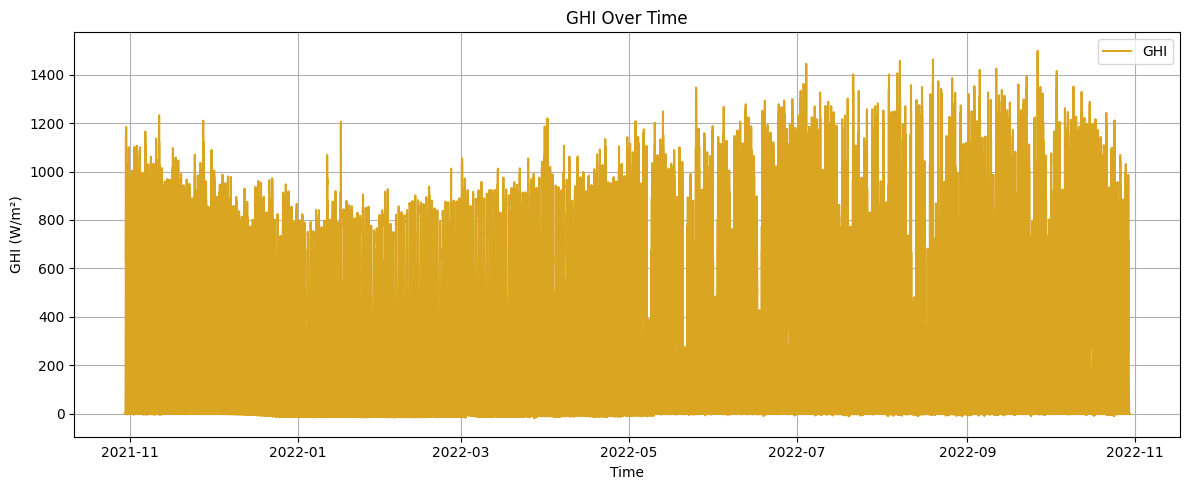

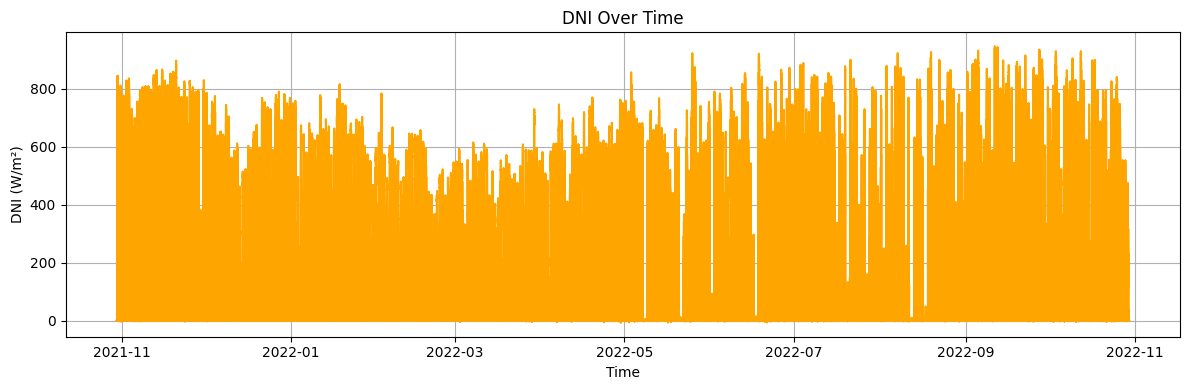

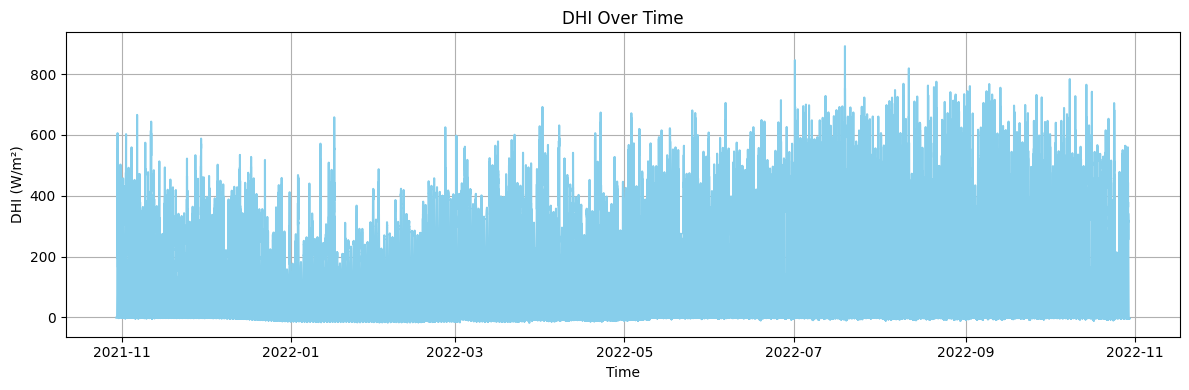

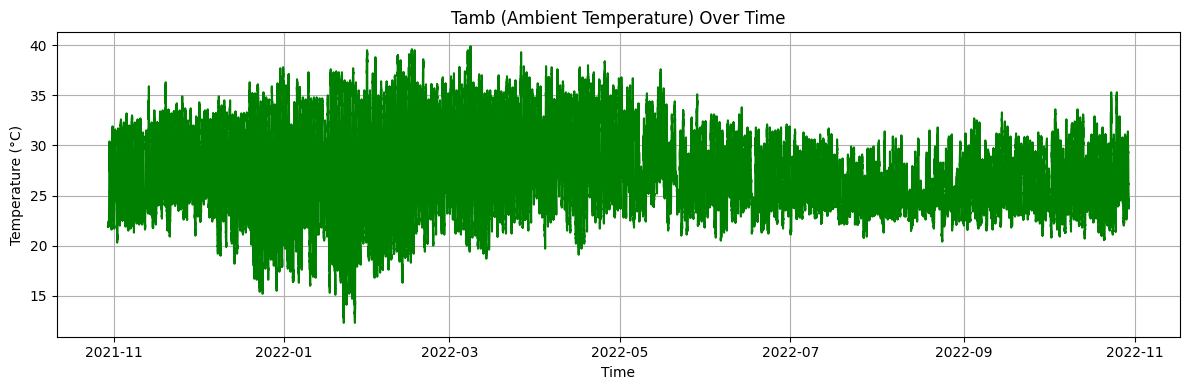

In [19]:
# Time series 
# Detect Timestamp Column
possible_time_cols = ['Timestamp', 'timestamp', 'datetime', 'time', 'Date', 'date']
timestamp_col = None

for col in df.columns:
    if col in possible_time_cols:
        timestamp_col = col
        break

if timestamp_col is None:
    raise KeyError(" No valid timestamp column found in the dataset.")

# Convert Timestamp to datetime and set as index
df[timestamp_col] = pd.to_datetime(df[timestamp_col])
df.set_index(timestamp_col, inplace=True)
print(f"Datetime column '{timestamp_col}' converted and set as index.")

# Plot GHI Over Time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['GHI'], label='GHI', color='goldenrod')
plt.title("GHI Over Time")
plt.xlabel("Time")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Plot DNI Over Time
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y="DNI", data=df, color="orange")
plt.title("DNI Over Time")
plt.ylabel("DNI (W/m²)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot DHI Over Time
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y="DHI", data=df, color="skyblue")
plt.title("DHI Over Time")
plt.ylabel("DHI (W/m²)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tamb Over Time
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y="Tamb", data=df, color="green")
plt.title("Tamb (Ambient Temperature) Over Time")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

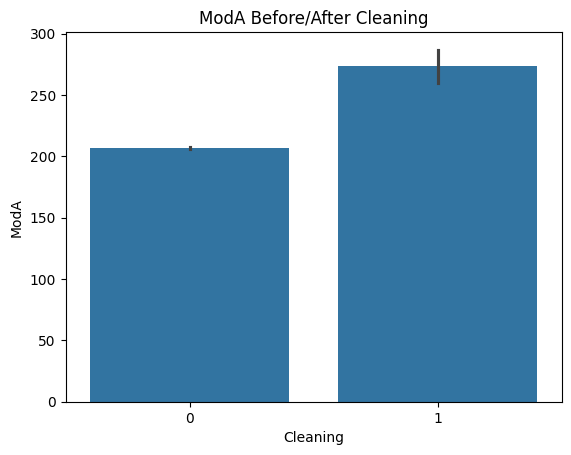

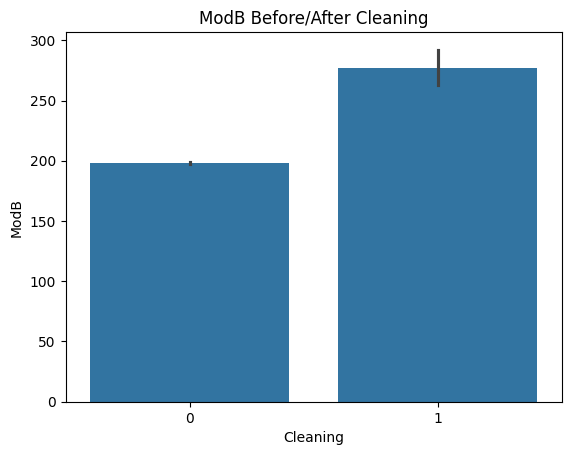

In [20]:
# Cleaning impact (ModA & ModB)

if 'Cleaning' in df.columns:
    sns.barplot(x='Cleaning', y='ModA', data=df)
    plt.title("ModA Before/After Cleaning")
    plt.show()

    sns.barplot(x='Cleaning', y='ModB', data=df)
    plt.title("ModB Before/After Cleaning")
    plt.show()

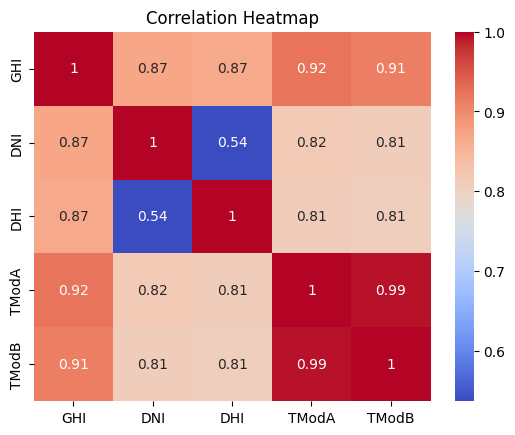

In [21]:
# Corrlation Matrix

corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

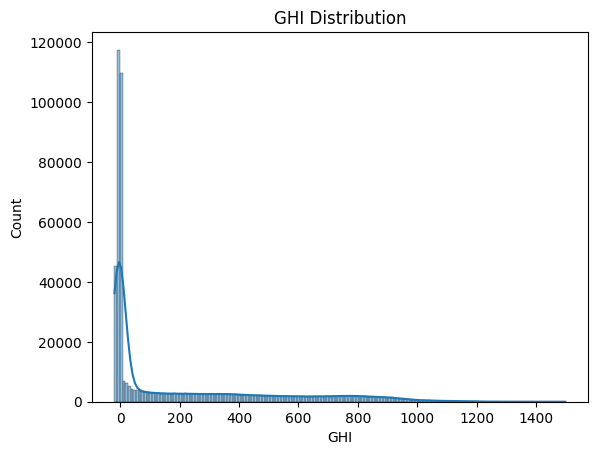

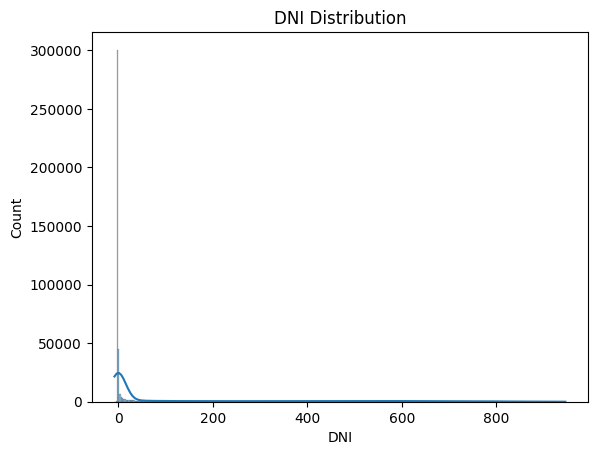

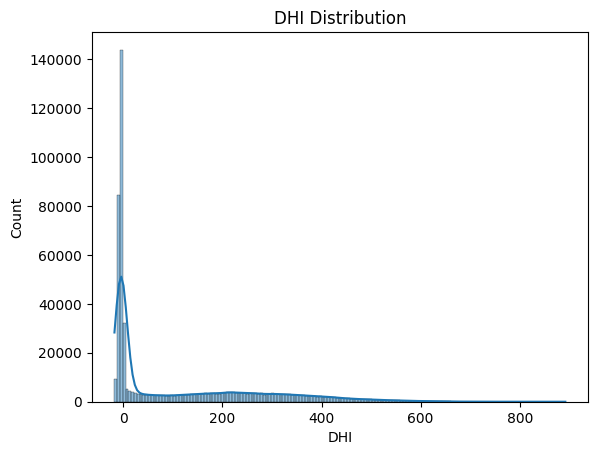

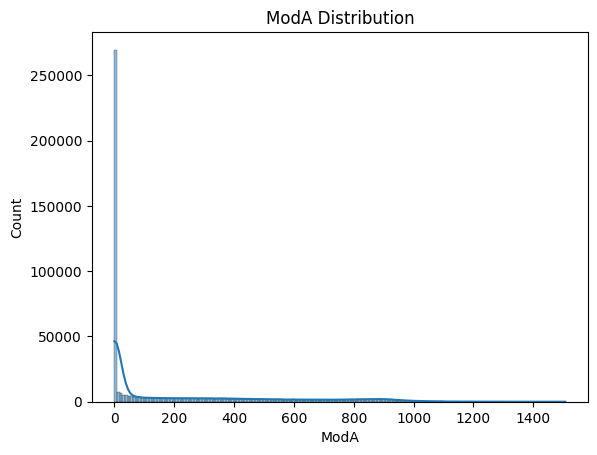

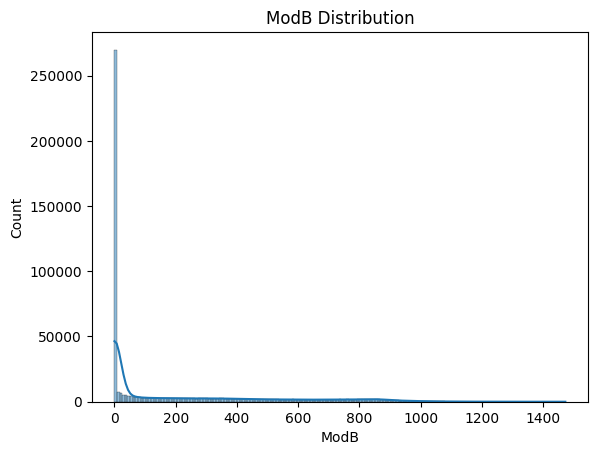

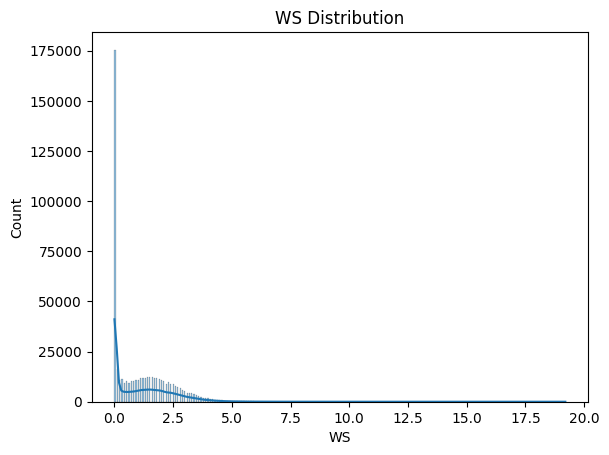

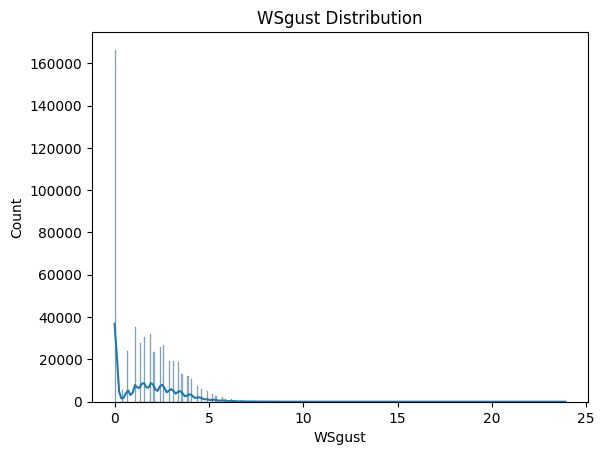

In [22]:
# Univariate Visualization using Histograms

for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

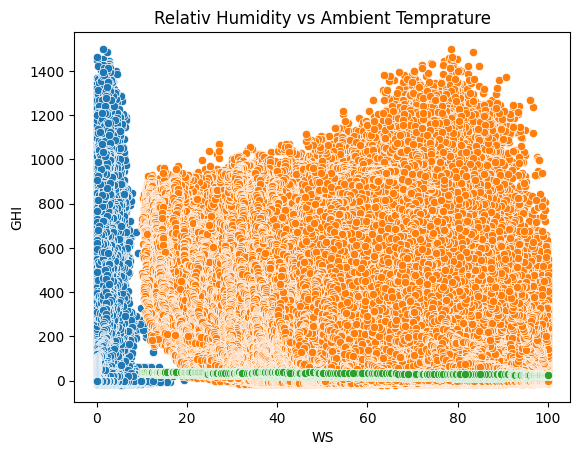

In [23]:
# Bivariate Scatter Plots

sns.scatterplot(data=df, x ="WS", y= "GHI")
plt.title ("Wind speed vs GHI")
plt.show

sns.scatterplot(data=df, x ="RH", y= "GHI")
plt.title ("Relativ Humidity vs GHI")
plt.show

sns.scatterplot(data=df, x ="RH", y= "Tamb")
plt.title ("Relativ Humidity vs Ambient Temprature")
plt.show

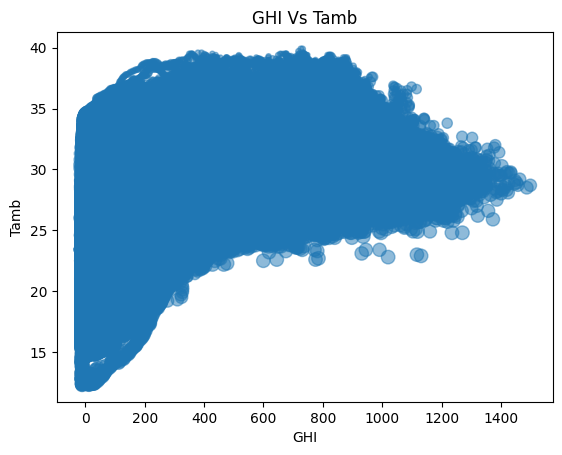

In [24]:
# Bubble chart (GHI Vs Tamb, Bubble =RH)
plt.Figure(figsize=(10,6))
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI Vs Tamb")
plt.show()